## ASSESMENT OF RISKS ASSOCIATED WITH VENTURING INTO AVIATION MARKET FOR COMPANY'S DECISION MAKING

###         BUSINESS PROBLEM

This project focuses on evaluating different categories of aircraft and selecting the best initial options for the company's entry into the aviation market, specifically targeting airplanes for commercial and private enterprises. It will therefore focus on analysis historical data giving an overview of the risks associated with running aircraft business such as operational risks, mantainance costs based on aircraft damage ,aircraft safety measured by the number of accident incidences.

####           OBJECTIVES
* To determine potential risks associated with aircraft business
* To determine which aircraft are the lowest risk for the company to Venture into.
* To identify the most economical aircraft for recommendation to the management.

#### EXPLORATORY DATA ALALYSIS(EDA)
The goal of this project is to help the company make informed decisions on whether to enter into Aviation industry and this can only be achieved by carry out comprehensive analysis of the data given to determine the level of risks associated with this industry. The analysis has therefore employed the use of pandas and various libraries to explore the data.

In [10]:
#Importing the various libraries for purposes of reading the data, statitical /Eploratory data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
# Reading 'AviationData.csv' into pandas dataframe with the variable name df
df = pd.read_csv('Data\\AviationData.csv', encoding = 'latin1', low_memory= False)

In [13]:
#Getting the first five rows of the data to get a quick synopsis of the data structure in order to dertimine the next cause of action
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [15]:
#Summary review of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Summary Information on the dataFrame indicates the is data cleaning that needs to be done, from the above output, the data type for Accidents.Number has been returned as n object and not an interger and yet it takes the form of discrete data.

In [16]:
df.shape

(88889, 31)

In [18]:
# To determine the possible outliers in the dataframe- Values that don't fit with the pattern of the data
category_counts = df['Aircraft.Category'].value_counts()
print(category_counts)

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64


The aircraft Category has one that is unknown which is a clear indicator of a data point that significantly differ from the rest.

In [20]:
Accident_counts = df['Accident.Number'].value_counts()
print(Accident_counts)

Accident.Number
CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: count, Length: 88863, dtype: int64


In [22]:
damage_counts = df['Aircraft.damage'].value_counts()
print(damage_counts)

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64


In [24]:
Engine_counts = df['Number.of.Engines'].value_counts()
print(Engine_counts)

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64


In [25]:
#To identify any missing values in the dataframe
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [27]:
#Using value counts for categorical columns which are important in arriving at the conclusion to determine unique values
df['Aircraft.Category'].value_counts(dropna=False)

Aircraft.Category
NaN                  56602
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [4]:
# To identify how many different data types are in a column.
df.apply(type).value_counts()


<class 'pandas.core.series.Series'>    31
Name: count, dtype: int64

In [6]:
# Check column names with their positions
for i, col in enumerate(df.columns):
    print(i, col)

0 Event.Id
1 Investigation.Type
2 Accident.Number
3 Event.Date
4 Location
5 Country
6 Latitude
7 Longitude
8 Airport.Code
9 Airport.Name
10 Injury.Severity
11 Aircraft.damage
12 Aircraft.Category
13 Registration.Number
14 Make
15 Model
16 Amateur.Built
17 Number.of.Engines
18 Engine.Type
19 FAR.Description
20 Schedule
21 Purpose.of.flight
22 Air.carrier
23 Total.Fatal.Injuries
24 Total.Serious.Injuries
25 Total.Minor.Injuries
26 Total.Uninjured
27 Weather.Condition
28 Broad.phase.of.flight
29 Report.Status
30 Publication.Date


In [7]:
# Check types inside each column
print(df['Longitude'].apply(type).value_counts())
print(df['Latitude'].apply(type).value_counts())
print(df['Broad.phase.of.flight'].apply(type).value_counts())


Longitude
<class 'float'>    54516
<class 'str'>      34373
Name: count, dtype: int64
Latitude
<class 'float'>    54507
<class 'str'>      34382
Name: count, dtype: int64
Broad.phase.of.flight
<class 'str'>      61724
<class 'float'>    27165
Name: count, dtype: int64


These columns contains both numeric and text values, however those columns are not critical to the primary objectives of our our data analysis,hence no deeper analysis on those columns.

### DATA CLEANING
It is important to employ the critical columns that will help determine the risk associated with venturing into aviation business. A new set of data will therefore be created with the columns only neccesary for this analysis. The columns include but not limited to: Event ID,Accident.Number,Aircraft Category,Aircraft damage, Event date, Total Fatal Injuries, Total Serious Injuries, weather condition, Injury Severity, Broad phase of flight.These fields are directly related to accident frequency, severity, aircraft type, and environmental conditions, which are critical for evaluating business risks in aviation.

In [1]:
# To create a new list of the important columns into a variable called Important_Columns
Important_Columns = ['Event.Id','Accident.Number','Event.Date','Location','Injury.Severity','Aircraft.damage','Aircraft.Category','FAR.Description','Purpose.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries','Weather.Condition']

In [2]:
# Print important columns
print(Important_Columns)

['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'FAR.Description', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Weather.Condition']


In [7]:
# Creating a new dataFrame with the important columns for risk analysis with the dataframe variable Risk_df
Risk_df = df[Important_Columns]
print(Risk_df)

             Event.Id Accident.Number  Event.Date         Location  \
0      20001218X45444      SEA87LA080  1948-10-24  MOOSE CREEK, ID   
1      20001218X45447      LAX94LA336  1962-07-19   BRIDGEPORT, CA   
2      20061025X01555      NYC07LA005  1974-08-30    Saltville, VA   
3      20001218X45448      LAX96LA321  1977-06-19       EUREKA, CA   
4      20041105X01764      CHI79FA064  1979-08-02       Canton, OH   
...               ...             ...         ...              ...   
88884  20221227106491      ERA23LA093  2022-12-26    Annapolis, MD   
88885  20221227106494      ERA23LA095  2022-12-26      Hampton, NH   
88886  20221227106497      WPR23LA075  2022-12-26       Payson, AZ   
88887  20221227106498      WPR23LA076  2022-12-26       Morgan, UT   
88888  20221230106513      ERA23LA097  2022-12-29       Athens, GA   

      Injury.Severity Aircraft.damage Aircraft.Category FAR.Description  \
0            Fatal(2)       Destroyed               NaN             NaN   
1        

### RISK AND TRENDS ANALYSIS BY VISUALIZATIONS USING BARCHARTS AND LINE GRAPHS
Accident Number by Weather Conditions

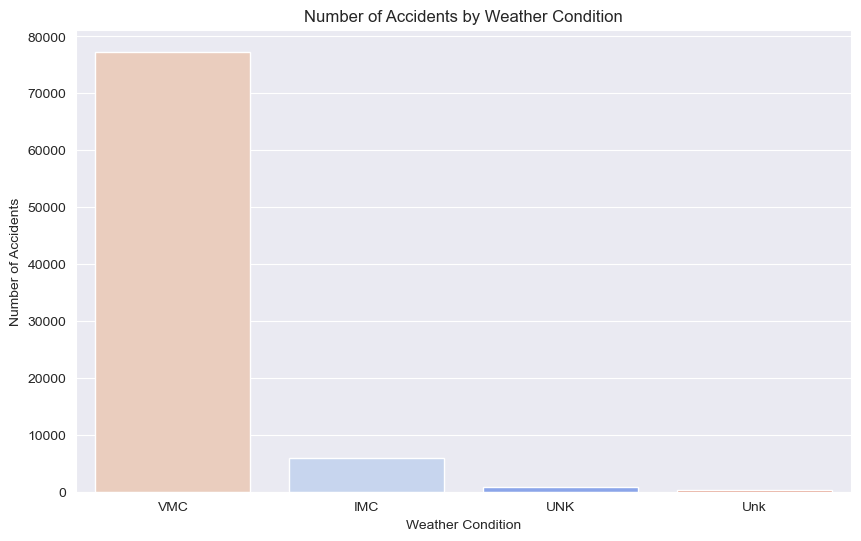

In [17]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.countplot(
    data=Risk_df,
    x='Weather.Condition',
    hue='Weather.Condition',
    order=Risk_df['Weather.Condition'].value_counts().index,
    palette='coolwarm',
    legend=False
)

plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

From the bar chart it is clear that most accidents occur during good weather as compared to the other two weather conditions,safety systems must be implemented well even in good weathers.